## `Section 02: Importing data from other file types`

### 01-Not so flat any more

In Chapter 1, you learned how to use the IPython magic command `! ls` to explore your current working directory. You can also do this natively in Python using the library os, which consists of miscellaneous operating system interfaces.

The first line of the following code imports the library os, the second line stores the name of the current directory in a string called wd and the third outputs the contents of the directory in a list to the shell.

``` 
import os
wd = os.getcwd()
os.listdir(wd)

```

Run this code in the IPython shell and answer the following questions. Ignore the files that begin with ..

Check out the contents of your current directory and answer the following questions: (1) which file is in your directory and NOT an example of a flat file; (2) why is it not a flat file?

In [1]:
import os
wd = os.getcwd()
os.listdir(wd)

['01-Introduction_and_flat_files.ipynb',
 '02-Importing_data_from_other_file_types.ipynb',
 'datasets']

### 02-Loading a pickled file

* Import the `pickle` package.
* Complete the second argument of `open()` so that it is read only for a binary file. This argument will be a string of two letters, one signifying 'read only', the other 'binary'.
* Pass the correct argument to `pickle.load()`; it should use the variable that is bound to `open`.
* Print the data, `d`.
* Print the datatype of `d`; take your mind back to your previous use of the function `type()`.


In [2]:
# Import pickle package
import pickle

# Open pickle file and load data: d
with open('datasets/data.pkl', "rb") as file:
    d = pickle.load(file)

# Print d
print(d)

# Print datatype of d
print(type(d))

{'June': '69.4', 'Aug': '85', 'Airline': '8', 'Mar': '84.4'}
<class 'dict'>


### 03-Listing sheets in Excel files

* Assign the spreadsheet filename (provided above) to the variable `file`.
* Pass the correct argument to `pd.ExcelFile()` to load the file using pandas, assigning the result to the variable `xls`.
* Print the sheetnames of the Excel spreadsheet by passing the necessary argument to the `print()` function.

In [3]:
# Import pandas
import pandas as pd

# Assign spreadsheet filename: file
file = 'datasets/battledeath.xlsx'

# Load spreadsheet: xls
xls = pd.ExcelFile(file)

# Print sheet names
print(xls.sheet_names)


['2002', '2004']


### 04-Importing sheets from Excel files
* Load the sheet `'2004'` into the DataFrame `df1` using its name as a string.
* Print the head of `df1` to the shell.
* Load the sheet `2002` into the DataFrame `df2` using its index (`0`).
* Print the head of `df2` to the shell.

In [4]:
# Load a sheet into a DataFrame by name: df1
df1 = xls.parse('2004')

# Print the head of the DataFrame df1
print(df1.head())

# Load a sheet into a DataFrame by index: df2
df2 = xls.parse(0)

# Print the head of the DataFrame df2
print(df2.head())

  War(country)      2004
0  Afghanistan  9.451028
1      Albania  0.130354
2      Algeria  3.407277
3      Andorra  0.000000
4       Angola  2.597931
  War, age-adjusted mortality due to       2002
0                        Afghanistan  36.083990
1                            Albania   0.128908
2                            Algeria  18.314120
3                            Andorra   0.000000
4                             Angola  18.964560


### 05-Customizing your spreadsheet import

* Parse the first sheet by index. In doing so, skip the first row of data and name the columns `'Country'` and `'AAM due to War (2002)'` using the argument `names`. The values passed to `skiprows` and `names` all need to be of type `list`.
* Parse the second sheet by index. In doing so, parse only the first column with the `usecols` parameter, skip the first row and rename the column `'Country'`. The argument passed to `usecols` also needs to be of type `list`.

In [5]:
# Parse the first sheet and rename the columns: df1
df1 = xls.parse(0, skiprows=[0], names=['Country', 'AAM due to War (2002)'])

# Print the head of the DataFrame df1
print(df1.head())

# Parse the first column of the second sheet and rename the column: df2
df2 = xls.parse(1, usecols=[0], skiprows=[0], names=['Country'])

# Print the head of the DataFrame df2
print(df2.head())

               Country  AAM due to War (2002)
0              Albania               0.128908
1              Algeria              18.314120
2              Andorra               0.000000
3               Angola              18.964560
4  Antigua and Barbuda               0.000000
               Country
0              Albania
1              Algeria
2              Andorra
3               Angola
4  Antigua and Barbuda


### 06-Importing SAS files

* Import the module `SAS7BDAT` from the library `sas7bdat`.
* In the context of the file `'sales.sas7bdat'`, load its contents to a DataFrame `df_sas`, using the method `to_data_frame()` on the object `file`.
* Print the head of the DataFrame `df_sas`.
* Execute your entire script to produce a histogram plot!

     YEAR     P           S
0  1950.0  12.9  181.899994
1  1951.0  11.9  245.000000
2  1952.0  10.7  250.199997
3  1953.0  11.3  265.899994
4  1954.0  11.2  248.500000


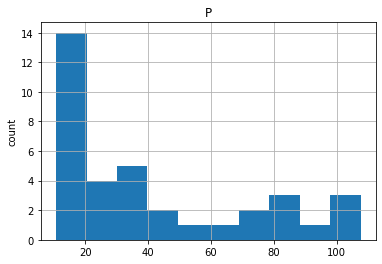

In [7]:
# Import sas7bdat package and matplotlib
import matplotlib.pyplot as plt
from sas7bdat import SAS7BDAT

# Save file to a DataFrame: df_sas
with SAS7BDAT('datasets/sales.sas7bdat') as file:
    df_sas = file.to_data_frame()

# Print head of DataFrame
print(df_sas.head())

# Plot histogram of DataFrame features (pandas and pyplot already imported)
pd.DataFrame.hist(df_sas[['P']])
plt.ylabel('count')
plt.show()

  wbcode               country  disa1  disa2  disa3  disa4  disa5  disa6  \
0    AFG           Afghanistan   0.00   0.00   0.76   0.73    0.0   0.00   
1    AGO                Angola   0.32   0.02   0.56   0.00    0.0   0.00   
2    ALB               Albania   0.00   0.00   0.02   0.00    0.0   0.00   
3    ARE  United Arab Emirates   0.00   0.00   0.00   0.00    0.0   0.00   
4    ARG             Argentina   0.00   0.24   0.24   0.00    0.0   0.23   

   disa7  disa8  ...  disa16  disa17  disa18  disa19  disa20  disa21  disa22  \
0   0.00    0.0  ...     0.0     0.0     0.0    0.00    0.00     0.0    0.00   
1   0.56    0.0  ...     0.0     0.4     0.0    0.61    0.00     0.0    0.99   
2   0.00    0.0  ...     0.0     0.0     0.0    0.00    0.00     0.0    0.00   
3   0.00    0.0  ...     0.0     0.0     0.0    0.00    0.00     0.0    0.00   
4   0.00    0.0  ...     0.0     0.0     0.0    0.00    0.05     0.0    0.00   

   disa23  disa24  disa25  
0    0.02    0.00    0.00  
1    0

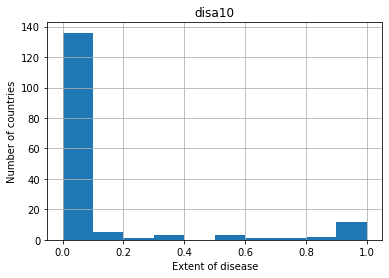

In [9]:
# Import pandas
import pandas as pd

# Load Stata file into a pandas DataFrame: df
df = pd.read_stata('datasets/disarea.dta')

# Print the head of the DataFrame df
print(df.head())

# Plot histogram of one column of the DataFrame
pd.DataFrame.hist(df[['disa10']])
plt.xlabel('Extent of disease')
plt.ylabel('Number of countries')
plt.show()


In [11]:
# Import packages
import numpy as np
import h5py

# Assign filename: file
file = 'datasets/LIGO_data.hdf5'

# Load file: data
data = h5py.File(file, 'r')

# Print the datatype of the loaded file
print(type(data))

# Print the keys of the file
for key in data.keys():
    print(key)


<class 'h5py._hl.files.File'>
meta
quality
strain


### 07-Extracting data from your HDF5 file

* Assign the HDF5 group `data['strain']` to `group`.
* In the `for` loop, print out the keys of the HDF5 group in `group`.
* Assign the time series data `data['strain']['Strain']` to a NumPy array called `strain`.
* Set `num_samples` equal to `10000`, the number of time points we wish to sample.
* Execute the rest of the code to produce a plot of the time series data in `LIGO_data.hdf5`.

Strain


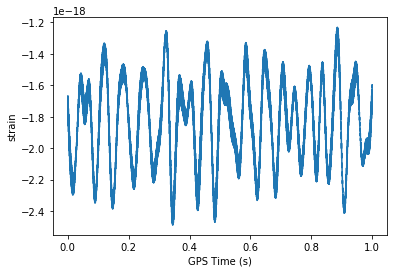

In [12]:
# Get the HDF5 group: group
group = data['strain']

# Check out keys of group
for key in group.keys():
    print(key)

# Set variable equal to time series data: strain
strain = np.array(data['strain']['Strain'])

# Set number of time points to sample: num_samples
num_samples = 10000

# Set time vector
time = np.arange(0, 1, 1/num_samples)

# Plot data
plt.plot(time, strain[:num_samples])
plt.xlabel('GPS Time (s)')
plt.ylabel('strain')
plt.show()


### 08-Loading .mat files

* Import the package `scipy.io`.
* Load the file `'albeck_gene_expression.mat'` into the variable `mat`; do so using the function `scipy.io.loadmat()`.
* Use the function `type()` to print the datatype of `mat` to the IPython shell.

In [25]:
# Import package
import scipy.io

# Load MATLAB file: mat
mat = scipy.io.loadmat('datasets/albeck_gene_expression.mat')

# Print the datatype type of mat
print(type(mat))


<class 'dict'>


### 09-The structure of .mat in Python

* Use the method `.keys()` on the dictionary `mat` to print the keys. Most of these keys (in fact the ones that do NOT begin and end with '__') are variables from the corresponding MATLAB environment.
* Print the type of the value corresponding to the key `'CYratioCyt'` in `mat`. Recall that `mat['CYratioCyt']` accesses the value.
* Print the shape of the value corresponding to the key `'CYratioCyt'` using the `numpy` function `shape()`.
* Execute the entire script to see some oscillatory gene expression data!

dict_keys(['__header__', '__version__', '__globals__', 'rfpCyt', 'rfpNuc', 'cfpNuc', 'cfpCyt', 'yfpNuc', 'yfpCyt', 'CYratioCyt'])
<class 'numpy.ndarray'>
(200, 137)


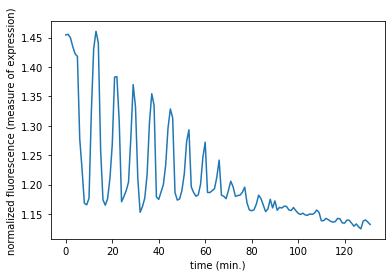

In [26]:
# Print the keys of the MATLAB dictionary
print(mat.keys())

# Print the type of the value corresponding to the key 'CYratioCyt'
print(type(mat['CYratioCyt']))

# Print the shape of the value corresponding to the key 'CYratioCyt'
print(np.shape(mat['CYratioCyt']))


# Subset the array and plot it
data = mat['CYratioCyt'][25, 5:]
fig = plt.figure()
plt.plot(data)
plt.xlabel('time (min.)')
plt.ylabel('normalized fluorescence (measure of expression)')
plt.show()


==================================
### `The End`  
==================================